In [ ]:
!pip install pycaret

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
train = pd.read_csv('./train.csv')
test  = pd.read_csv('./test.csv')

In [4]:
from pycaret.classification import *

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1281
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.823400,0.857200,0.707100,0.810800,0.751900,0.616500
1,Gradient Boosting Classifier,0.820100,0.854200,0.707400,0.802800,0.749600,0.610600
2,Extreme Gradient Boosting,0.816900,0.852700,0.698900,0.800400,0.744100,0.603000
3,Light Gradient Boosting Machine,0.807300,0.852400,0.707200,0.773100,0.737000,0.585800
4,Ridge Classifier,0.796100,0.000000,0.685900,0.758600,0.719000,0.560000
5,Ada Boost Classifier,0.794600,0.838900,0.731900,0.735000,0.732000,0.565700
6,Linear Discriminant Analysis,0.794500,0.838600,0.685900,0.755500,0.717500,0.557000
7,Logistic Regression,0.791300,0.836900,0.681700,0.751200,0.713100,0.550200
8,Random Forest Classifier,0.772000,0.827200,0.681900,0.717900,0.695800,0.514300
9,Decision Tree Classifier,0.767200,0.751100,0.660900,0.716400,0.685300,0.501300


In [9]:
lgbm  = create_model('lightgbm')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.9028,0.8333,0.7692,0.8000,0.6688
1,0.7937,0.8301,0.6667,0.7619,0.7111,0.5517
2,0.8095,0.8632,0.7083,0.7727,0.7391,0.5896
3,0.7581,0.7325,0.5833,0.7368,0.6512,0.4698
4,0.7581,0.8388,0.6250,0.7143,0.6667,0.4781
5,0.7581,0.8629,0.7083,0.6800,0.6939,0.4940
6,0.8548,0.8717,0.7917,0.8261,0.8085,0.6917
7,0.8226,0.9002,0.6667,0.8421,0.7442,0.6112
8,0.8387,0.8684,0.7500,0.8182,0.7826,0.6548
9,0.8387,0.8528,0.7391,0.8095,0.7727,0.6481


In [10]:
tuned_lightgbm = tune_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.8825,0.7917,0.8261,0.8085,0.6947
1,0.7937,0.8301,0.6667,0.7619,0.7111,0.5517
2,0.8095,0.8900,0.6250,0.8333,0.7143,0.5758
3,0.7419,0.7467,0.5417,0.7222,0.6190,0.4299
4,0.7742,0.8037,0.6667,0.7273,0.6957,0.5167
5,0.8387,0.8662,0.7917,0.7917,0.7917,0.6601
6,0.8548,0.9079,0.7500,0.8571,0.8000,0.6869
7,0.8387,0.8904,0.7083,0.8500,0.7727,0.6493
8,0.8871,0.8717,0.8333,0.8696,0.8511,0.7602
9,0.8226,0.8294,0.6957,0.8000,0.7442,0.6094


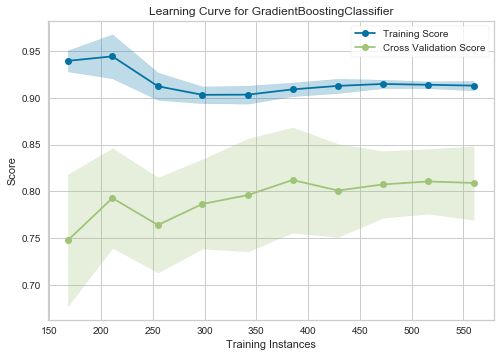

In [11]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')


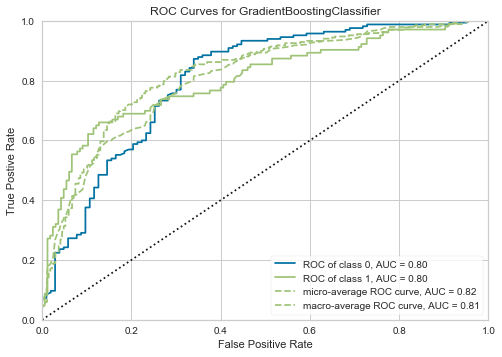

In [11]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

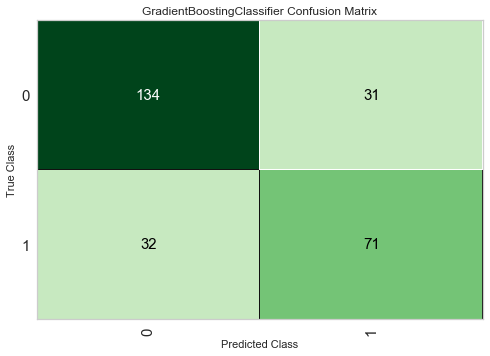

In [12]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

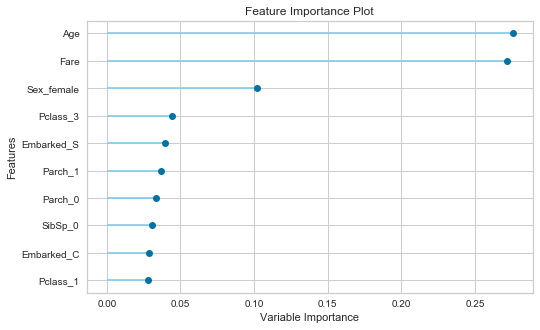

In [13]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')


In [14]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

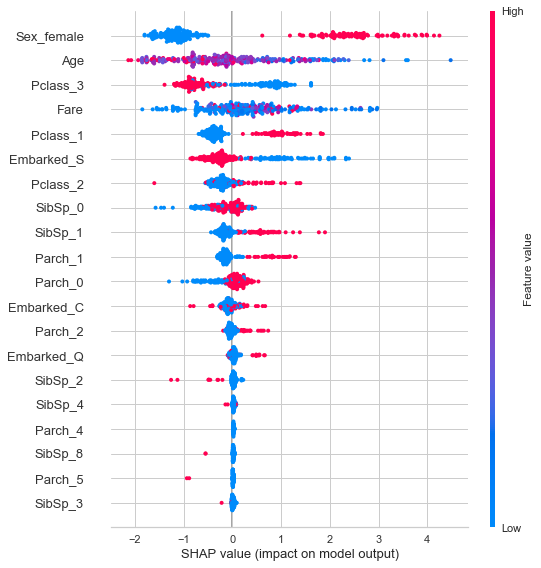

In [15]:
interpret_model(tuned_lightgbm)

In [16]:
predict_model(tuned_lightgbm, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0207
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2306
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0.5796
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.4152
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.3356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0011
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9752
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0003
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0011


In [17]:
predictions = predict_model(tuned_lightgbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0207
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2306
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0.5796
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.4152
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.3356


In [18]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission4.csv',index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
